In [171]:
import os
import numpy as np # linear algebra
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statistics import mean 
from matplotlib import pyplot

import optuna

from sklearn import linear_model, ensemble, datasets, model_selection
from sklearn.metrics import classification_report

from sklearn.utils import resample

from sklearn.metrics import r2_score,mean_squared_error
import sklearn.metrics as metrics

from sklearn.metrics import confusion_matrix
#import graphviz

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve

import sklearn.svm

In [2]:
import pandas as pd
import pathlib

In [3]:
path = pathlib.Path('C:/Users/Scott/Documents/Repos/Datadive/Mar21-environmental-impact/data/')
path

WindowsPath('C:/Users/Scott/Documents/Repos/Datadive/Mar21-environmental-impact/data')

In [5]:
brownfields = pd.read_csv(path/'brownfields_data_with_county_geoid/brownfields_data_with_county_geoid.csv')

C:\Users\Scott\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (18,19,20,21,22,23,43,44,46,48,53,57,61,62,64,65,67,68,69,74,76,77,78,86,87,89,98) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
brownfields.columns.to_list()

['Grant Recipient Name',
 'Accomplishment Counted',
 'Cooperative Agreement Number',
 'Type of Brownfields Grant',
 'ACRES Property ID',
 'Property Name',
 'Property Address 1',
 'Property City',
 'Property  State',
 'Property Zip Code',
 'IC Data Address',
 'Redev Completion Date',
 'Property Size',
 'Local Parcel Number',
 'Ownership Entity',
 'Current Owner',
 'Did Ownership Change',
 'SFLLP fact into the ownership',
 'Property Latitude',
 'Property Longitude',
 'Horizontal Collection Method',
 'Source Map Scale',
 'Reference Point',
 'Horizontal Reference Datum',
 'Description/History',
 'Past Use: Greenspace (arces)',
 'Past Use: Residential (arces)',
 'Past Use: Commercial (arces)',
 'Past Use: Industrial (arces)',
 'Past Use: Multistory (arces)',
 'Future Use: Multistory (arces)',
 'Assessment Phase',
 'Assessment Start Date',
 'Assessment Completion Date',
 'Source of Assessment Funding',
 'Entity Providing Assmnt Funds',
 'Amt of Assessment Funding',
 'Cleanup Required',
 'Cnt

### Classfication Model

In [132]:
brownfield_subset = brownfields[['Cleanup Required', 'Amt of Assessment Funding', 'Cntmnt Fnd-Arsenic',
 'Cntmnt Fnd-Asbestos',
 'Cntmnt Fnd-Chromium',
 'Cntmnt Fnd-Lead',
 'Cntmnt Fnd-Mercury',
 'Cntmnt Fnd-PAHs',
 'Cntmnt Fnd-PCBs',
 'Cntmnt Fnd-Petroleum',
 'Cntmnt Fnd-SVOCs',
 'Cntmnt Fnd-VOCs',
 '2010 % Below Poverty' #,'2010 Median Income', '2010 % Low Income', '2010 % Vacant Housing', '2010 % Unemployed'
]]

In [133]:
brownfield_subset

,Cleanup Required,Amt of Assessment Funding,Cntmnt Fnd-Arsenic,Cntmnt Fnd-Asbestos,Cntmnt Fnd-Chromium,Cntmnt Fnd-Lead,Cntmnt Fnd-Mercury,Cntmnt Fnd-PAHs,Cntmnt Fnd-PCBs,Cntmnt Fnd-Petroleum,Cntmnt Fnd-SVOCs,Cntmnt Fnd-VOCs,2010 % Below Poverty
0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.41
1,U,240.00,NaN,NaN,NaN,NaN,NaN,Y,NaN,Y,NaN,NaN,38.89
2,Y,132.53,NaN,NaN,NaN,Y,NaN,Y,NaN,NaN,NaN,NaN,53.78
3,Y,132.53,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,53.36
4,U,132.53,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,53.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78522,N,2930.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.86
78523,U,1517.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.86
78524,Y,3333.00,NaN,Y,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,20.00
78525,Y,250.00,NaN,Y,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,20.00


In [134]:
brownfield_subset['Cleanup Required'].value_counts()

Y    34388
U    19712
N    19275
u        5
Name: Cleanup Required, dtype: int64

In [135]:
brownfield_subset['Cntmnt Fnd-Arsenic'].value_counts(dropna=False)

NaN    70035
Y       8465
N         27
Name: Cntmnt Fnd-Arsenic, dtype: int64

In [136]:
brownfield_subset['Cntmnt Fnd-Lead'].value_counts(dropna=False)

NaN    53473
Y      23993
N       1060
x          1
Name: Cntmnt Fnd-Lead, dtype: int64

In [137]:
#brownfield_subset['Amount of Cleanup Funding'].value_counts(dropna=False)

In [138]:
#funding = brownfield_subset[['Amt of Assessment Funding', 'Amount of Cleanup Funding']]
#funding_clean = funding.dropna()

(0.0, 6000000.0)

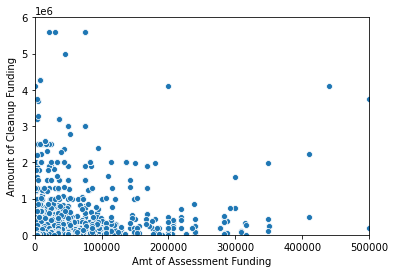

In [139]:
import seaborn as sns
#sns.set_theme(style="whitegrid")
ax = sns.scatterplot(x='Amt of Assessment Funding', y = 'Amount of Cleanup Funding', data=funding_clean)
ax.set_xlim(0,500000)
ax.set_ylim(0,6000000)

In [140]:
brownfield_subset_dummy = pd.get_dummies(brownfield_subset, columns = ['Cntmnt Fnd-Arsenic',
 'Cntmnt Fnd-Asbestos',
 'Cntmnt Fnd-Chromium',
 'Cntmnt Fnd-Lead',
 'Cntmnt Fnd-Mercury',
 'Cntmnt Fnd-PAHs',
 'Cntmnt Fnd-PCBs',
 'Cntmnt Fnd-Petroleum',
 'Cntmnt Fnd-SVOCs',
 'Cntmnt Fnd-VOCs'])
brownfield_subset_dummy

,Cleanup Required,Amt of Assessment Funding,2010 % Below Poverty,Cntmnt Fnd-Arsenic_N,Cntmnt Fnd-Arsenic_Y,Cntmnt Fnd-Asbestos_N,Cntmnt Fnd-Asbestos_Y,Cntmnt Fnd-Chromium_N,Cntmnt Fnd-Chromium_Y,Cntmnt Fnd-Lead_N,...,Cntmnt Fnd-PAHs_Y,Cntmnt Fnd-PCBs_N,Cntmnt Fnd-PCBs_Y,Cntmnt Fnd-Petroleum_N,Cntmnt Fnd-Petroleum_Y,Cntmnt Fnd-Petroleum_x,Cntmnt Fnd-SVOCs_N,Cntmnt Fnd-SVOCs_Y,Cntmnt Fnd-VOCs_N,Cntmnt Fnd-VOCs_Y
0,N,NaN,14.41,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,U,240.00,38.89,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,Y,132.53,53.78,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,Y,132.53,53.36,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,U,132.53,53.36,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78522,N,2930.00,42.86,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78523,U,1517.00,30.86,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78524,Y,3333.00,20.00,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78525,Y,250.00,20.00,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [151]:
full_rows_brown = brownfield_subset_dummy.dropna(subset=['Amt of Assessment Funding', '2010 % Below Poverty'])

In [152]:
full_rows_brown = full_rows_brown[(full_rows_brown['Cleanup Required']=='Y') |
                                 (full_rows_brown['Cleanup Required']=='N')]

In [153]:
full_rows_brown['Cleanup Required'] = full_rows_brown['Cleanup Required'].map({'Y': 1, 'N': 0})

In [154]:
full_rows_brown['Cleanup Required'].value_counts()/len(full_rows_brown)

1    0.589587
0    0.410413
Name: Cleanup Required, dtype: float64

In [155]:
X = full_rows_brown.drop('Cleanup Required', axis = 1)
y = full_rows_brown['Cleanup Required']

#42 = 9 in train set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [156]:
X_train.shape

(23554, 23)

In [126]:
    if classifier_name == 'SVC':
        svc_c = trial.suggest_float('svc_c', 1e-10, 1e10, log=True)
        classifier_obj = sklearn.svm.SVC(C=svc_c, gamma='auto')
        
    if classifier_name == 'KNN':
        neigh = trial.suggest_int("n_neighbors", 1, 2000)
        classifier_obj = sklearn.neighbors.KNeighborsClassifier(n_neighbors = neigh)

NameError: name 'classifier_name' is not defined

In [158]:
#Step 1. Define an objective function to be maximized.
def objective(trial):

    classifier_name = trial.suggest_categorical("classifier", ["LogReg", "RandomForest"])
    
    # Step 2. Setup values for the hyperparameters:
    if classifier_name == 'LogReg':
        logreg_c = trial.suggest_float("logreg_c", 1e-10, 1e10, log=True)
        classifier_obj = linear_model.LogisticRegression(C=logreg_c)
        
    if classifier_name == 'RandomForest':
        rf_n_estimators = trial.suggest_int("rf_n_estimators", 10, 300)
        rf_max_depth = trial.suggest_int("rf_max_depth", 2, 25, log=True)
        rf_max_features = trial.suggest_int("rf_max_features", 1, 16)
        rf_max_samples  = trial.suggest_int("rf_max_samples", 1, 20000)
        classifier_obj = ensemble.RandomForestClassifier(
            max_depth=rf_max_depth, n_estimators=rf_n_estimators,
            max_features=rf_max_features, max_samples=rf_max_samples
        )

    # Step 3: Scoring method:
    score = model_selection.cross_val_score(classifier_obj, X_train, y_train, n_jobs=-1, cv=5)
    accuracy = score.mean()
    return accuracy

# Step 4: Running it
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=15)

[I 2021-03-05 16:56:04,309] A new study created in memory with name: no-name-a9cba9fc-0c15-4bda-8964-ecad4c177724
[I 2021-03-05 16:56:08,217] Trial 0 finished with value: 0.7740513709387751 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 177, 'rf_max_depth': 3, 'rf_max_features': 16, 'rf_max_samples': 566}. Best is trial 0 with value: 0.7740513709387751.
[I 2021-03-05 16:56:10,000] Trial 1 finished with value: 0.5905578712873741 and parameters: {'classifier': 'LogReg', 'logreg_c': 1.1119888836767605e-09}. Best is trial 0 with value: 0.7740513709387751.
[I 2021-03-05 16:56:10,310] Trial 2 finished with value: 0.8118368673218619 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 14, 'rf_max_depth': 24, 'rf_max_features': 5, 'rf_max_samples': 4646}. Best is trial 2 with value: 0.8118368673218619.
[I 2021-03-05 16:56:13,474] Trial 3 finished with value: 0.7836039697487157 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 200, 'rf_max_depth':

In [159]:
# Getting the best trial:
print(f"The best trial is : \n{study.best_trial}")

# Getting the best score:
print(f"The best value is : \n{study.best_value}")

# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")

The best trial is : 
FrozenTrial(number=9, value=0.8343807171272367, datetime_start=datetime.datetime(2021, 3, 5, 16, 56, 21, 707120), datetime_complete=datetime.datetime(2021, 3, 5, 16, 56, 35, 779358), params={'classifier': 'RandomForest', 'rf_n_estimators': 248, 'rf_max_depth': 25, 'rf_max_features': 16, 'rf_max_samples': 15290}, distributions={'classifier': CategoricalDistribution(choices=('LogReg', 'RandomForest')), 'rf_n_estimators': IntUniformDistribution(high=300, low=10, step=1), 'rf_max_depth': IntLogUniformDistribution(high=25, low=2, step=1), 'rf_max_features': IntUniformDistribution(high=16, low=1, step=1), 'rf_max_samples': IntUniformDistribution(high=20000, low=1, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=9, state=TrialState.COMPLETE)
The best value is : 
0.8343807171272367
The best parameters are : 
{'classifier': 'RandomForest', 'rf_n_estimators': 248, 'rf_max_depth': 25, 'rf_max_features': 16, 'rf_max_samples': 15290}


In [160]:
randomForest_clf_optuna = RandomForestClassifier(n_estimators = study.best_params['rf_n_estimators'], 
                                                 max_depth=study.best_params['rf_max_depth'], 
                                                 max_features=study.best_params['rf_max_features'],
                                                 max_samples=study.best_params['rf_max_samples'], n_jobs=-1)
randomForest_clf_optuna.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, max_features=16, max_samples=15290,
                       n_estimators=248, n_jobs=-1)

In [161]:
y_test_pred = randomForest_clf_optuna.predict(X_test)

In [162]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[3327,  839],
       [ 708, 5221]], dtype=int64)

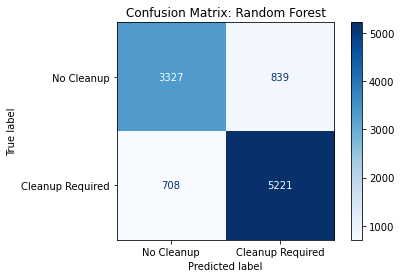

In [163]:
from sklearn.metrics import plot_confusion_matrix
class_names = ['No Cleanup', 'Cleanup Required']
disp = plot_confusion_matrix(randomForest_clf_optuna, X_test, y_test,
                             display_labels=class_names,
                             cmap=plt.cm.Blues,
                             normalize=None)
plt.title('Confusion Matrix: Random Forest')

plt.show()

In [173]:
print(classification_report(y_test, y_test_pred, target_names=class_names))

                  precision    recall  f1-score   support

      No Cleanup       0.82      0.80      0.81      4166
Cleanup Required       0.86      0.88      0.87      5929

        accuracy                           0.85     10095
       macro avg       0.84      0.84      0.84     10095
    weighted avg       0.85      0.85      0.85     10095



Feature: Amt of Assessment Funding, Score: 0.25116
Feature: 2010 % Below Poverty, Score: 0.29838
Feature: Cntmnt Fnd-Arsenic_N, Score: 0.00002
Feature: Cntmnt Fnd-Arsenic_Y, Score: 0.01593
Feature: Cntmnt Fnd-Asbestos_N, Score: 0.00046
Feature: Cntmnt Fnd-Asbestos_Y, Score: 0.12285
Feature: Cntmnt Fnd-Chromium_N, Score: 0.00000
Feature: Cntmnt Fnd-Chromium_Y, Score: 0.01180
Feature: Cntmnt Fnd-Lead_N, Score: 0.00025
Feature: Cntmnt Fnd-Lead_Y, Score: 0.05709
Feature: Cntmnt Fnd-Lead_x, Score: 0.00015
Feature: Cntmnt Fnd-Mercury_Y, Score: 0.01057
Feature: Cntmnt Fnd-PAHs_N, Score: 0.00036
Feature: Cntmnt Fnd-PAHs_Y, Score: 0.05046
Feature: Cntmnt Fnd-PCBs_N, Score: 0.00052
Feature: Cntmnt Fnd-PCBs_Y, Score: 0.02176
Feature: Cntmnt Fnd-Petroleum_N, Score: 0.00030
Feature: Cntmnt Fnd-Petroleum_Y, Score: 0.11087
Feature: Cntmnt Fnd-Petroleum_x, Score: 0.00000
Feature: Cntmnt Fnd-SVOCs_N, Score: 0.00067
Feature: Cntmnt Fnd-SVOCs_Y, Score: 0.00985
Feature: Cntmnt Fnd-VOCs_N, Score: 0.00034
F

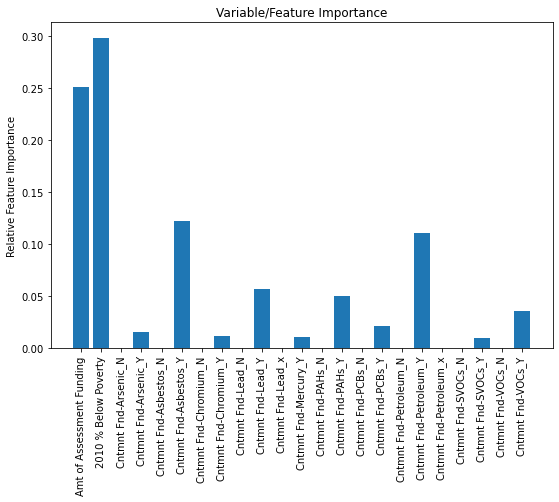

In [169]:
# feature names for later use with importance
feature_list = list(X_train.columns)
#feature_list

# get importance
importance = randomForest_clf_optuna.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %s, Score: %.5f' % (feature_list[i],v))
# plot feature importance
plt.figure(figsize=(9,6))
pyplot.bar(feature_list, importance)
pyplot.xticks(rotation=90)
pyplot.ylabel('Relative Feature Importance')
pyplot.title('Variable/Feature Importance')
pyplot.show()

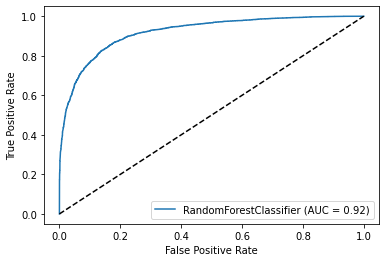

In [165]:
svc_disp = plot_roc_curve(randomForest_clf_optuna, X_test, y_test)
plt.plot([0,1], [0,1], 'k--') #dashed diagonal
#svc_disp_opt = plot_roc_curve(randomForest_clf_optuna, X_test, y_test)

plt.show()